# Hierarchical clustering

In [48]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import os

## HLCA scANVI

In [49]:
adata_hlca = sc.read("../datasets/hlca.h5ad")

In [59]:
methods_to_paths = {
    "wilcoxon_DE": "differential_expression/hlca_DE_cell_types.csv",
    "absolute_sum_expected_gradients": "expected_gradients/task_2_absolute_sum_expected_grads.csv",
    "sum_expected_gradients": "expected_gradients/task_2_sum_expected_grads.csv",
    "absolute_sum_integrated_gradients": "integrated_gradients/task_2_absolute_sum_integrated_grads.csv",
    "sum_integrated_gradients": "integrated_gradients/task_2_sum_integrated_grads.csv",
    "lime_absolute": "lime/lime_absolute.csv",
    "lime": "lime/lime.csv",
    "random": "random/task2_random.csv",
    "random_mean": "random/task2_mean.csv",
    # "ablation": "task2.csv"
}

results_df = pd.DataFrame(index=list(adata_hlca.var_names),
                          columns=methods_to_paths.keys())

1. Do it manually for one cell type
2. Loop through all cell types -> create one DF per cell type
3. Make the values absolute
3. Loop through all cell type DFs -> calculate spearman
4. Loop through all cell types -> clustermap

### Manual for one cell type

In [72]:
AT2_df = pd.DataFrame(index=list(adata_hlca.var_names),
                      columns=methods_to_paths.keys())

In [73]:
for method, path in methods_to_paths.items():
    method_df = pd.read_csv(f"../outputs/{path}",
                            index_col=0)
    AT2_df[method] = method_df["AT2"]
    

In [74]:
AT2_df

,wilcoxon_DE,absolute_sum_expected_gradients,sum_expected_gradients,absolute_sum_integrated_gradients,sum_integrated_gradients,lime_absolute,lime,random
FGR,0.000000e+00,115.908590,7.376847,2.697911e+00,-1.187900e+00,0.008885,-0.001859,0.019582
CFH,0.000000e+00,31.934937,2.381531,4.468500e+00,-3.315240e+00,0.008729,-0.003254,0.049273
HS3ST1,0.000000e+00,27.574543,7.219399,7.567664e+00,-7.477320e+00,0.012887,0.008515,0.003381
TMEM176A,4.985914e-129,34.460100,-6.832278,2.842184e+00,2.386844e+00,0.016719,-0.004692,0.008866
TFPI,0.000000e+00,310.259400,-111.135216,1.754265e+01,-4.512490e+00,0.007817,0.000589,1.194166
...,...,...,...,...,...,...,...,...
AC133644.2,2.473566e-09,5.515862,-0.832906,2.634362e-01,-6.486013e-02,0.031064,-0.004183,0.000982
TRG-AS1,5.451594e-49,12.548523,-1.209370,1.116849e-01,5.102680e-02,0.022201,0.001556,0.001467
CH17-262H11.1,9.819694e-01,0.015236,-0.003316,3.895973e-07,3.708296e-07,0.013852,0.000343,0.000103
RP1-34B20.21,1.507245e-05,4.163102,0.702043,5.562535e-01,-4.431773e-01,0.028561,0.007402,0.004377


In [78]:
AT2_df.apply(lambda df: df.abs())

,wilcoxon_DE,absolute_sum_expected_gradients,sum_expected_gradients,absolute_sum_integrated_gradients,sum_integrated_gradients,lime_absolute,lime,random
FGR,0.000000e+00,115.908590,7.376847,2.697911e+00,1.187900e+00,0.008885,0.001859,0.019582
CFH,0.000000e+00,31.934937,2.381531,4.468500e+00,3.315240e+00,0.008729,0.003254,0.049273
HS3ST1,0.000000e+00,27.574543,7.219399,7.567664e+00,7.477320e+00,0.012887,0.008515,0.003381
TMEM176A,4.985914e-129,34.460100,6.832278,2.842184e+00,2.386844e+00,0.016719,0.004692,0.008866
TFPI,0.000000e+00,310.259400,111.135216,1.754265e+01,4.512490e+00,0.007817,0.000589,1.194166
...,...,...,...,...,...,...,...,...
AC133644.2,2.473566e-09,5.515862,0.832906,2.634362e-01,6.486013e-02,0.031064,0.004183,0.000982
TRG-AS1,5.451594e-49,12.548523,1.209370,1.116849e-01,5.102680e-02,0.022201,0.001556,0.001467
CH17-262H11.1,9.819694e-01,0.015236,0.003316,3.895973e-07,3.708296e-07,0.013852,0.000343,0.000103
RP1-34B20.21,1.507245e-05,4.163102,0.702043,5.562535e-01,4.431773e-01,0.028561,0.007402,0.004377


In [82]:
AT2_spearman = AT2_df.corr(method="spearman")

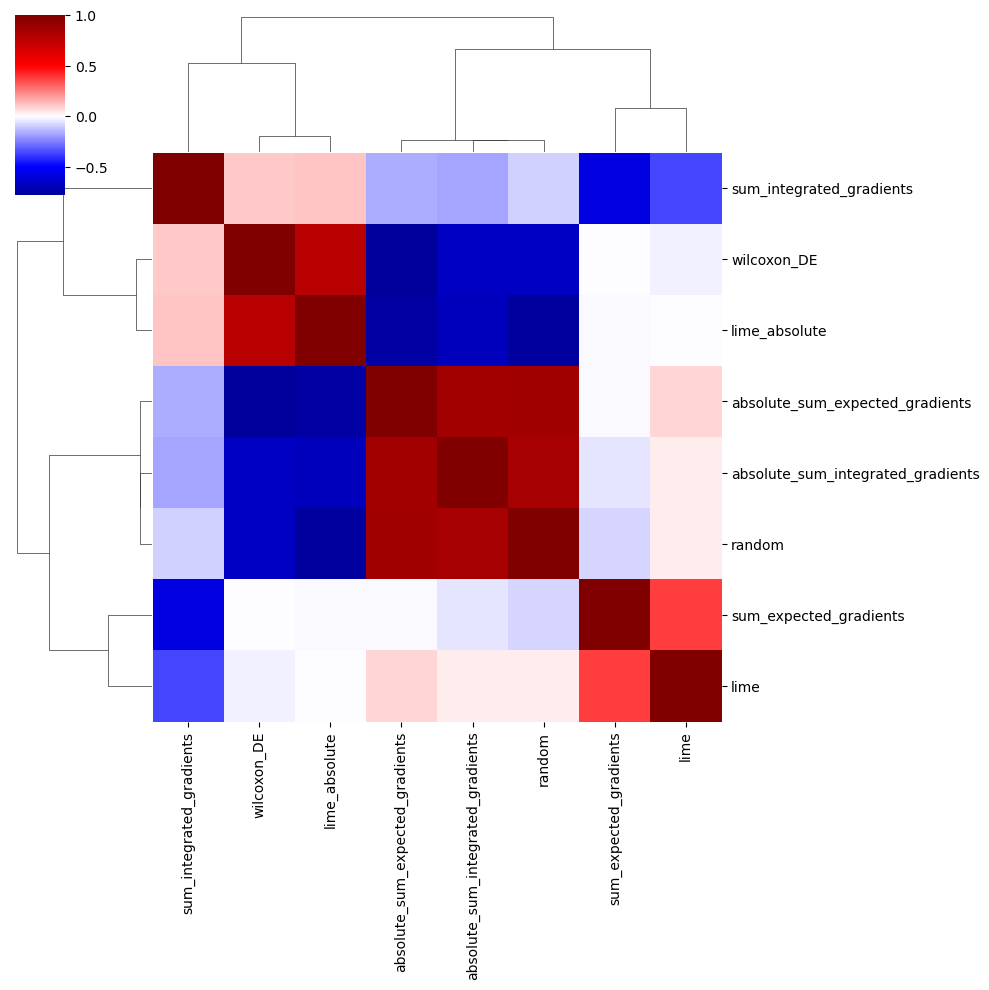

In [85]:
sns.clustermap(AT2_spearman,
               cmap="seismic",
               center=0.00)

## Loop through all cell types

## OLD STUFF WHERE WE JUST RAN CLUSTERMAP ON THE RAW OUTPUT TABLES

In [31]:
all_files = [os.path.join(path, name) for path, subdirs, files in os.walk("../outputs") for name in files]

all_tables = {}

for path in all_files:
    if "ipynb_checkpoints" not in path:
        table_name = path.split("/")[-1][:-4]
        all_tables[table_name] = path
all_tables

{'task_2_sum_integrated_grads': '../outputs/integrated_gradients/task_2_sum_integrated_grads.csv',
 'task_2_absolute_sum_integrated_grads': '../outputs/integrated_gradients/task_2_absolute_sum_integrated_grads.csv',
 'task_2_absolute_sum_expected_grads': '../outputs/expected_gradients/task_2_absolute_sum_expected_grads.csv',
 'task_2_sum_expected_grads': '../outputs/expected_gradients/task_2_sum_expected_grads.csv',
 'task1_random': '../outputs/random/task1_random.csv',
 'task2_random': '../outputs/random/task2_random.csv',
 'lime': '../outputs/lime/lime.csv',
 'lime_absolute': '../outputs/lime/lime_absolute.csv',
 'norman_DE_rest': '../outputs/differential_expression/norman_DE_rest.csv',
 'hlca_DE_cell_types': '../outputs/differential_expression/hlca_DE_cell_types.csv',
 'norman_DE_control': '../outputs/differential_expression/norman_DE_control.csv'}

task_2_sum_integrated_grads


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


task_2_absolute_sum_integrated_grads


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


task_2_absolute_sum_expected_grads


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


task_2_sum_expected_grads


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


task1_random


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


task2_random


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


lime


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


lime_absolute


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


norman_DE_rest


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


hlca_DE_cell_types


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


norman_DE_control


/home/lukas/anaconda3/envs/yuge_env/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


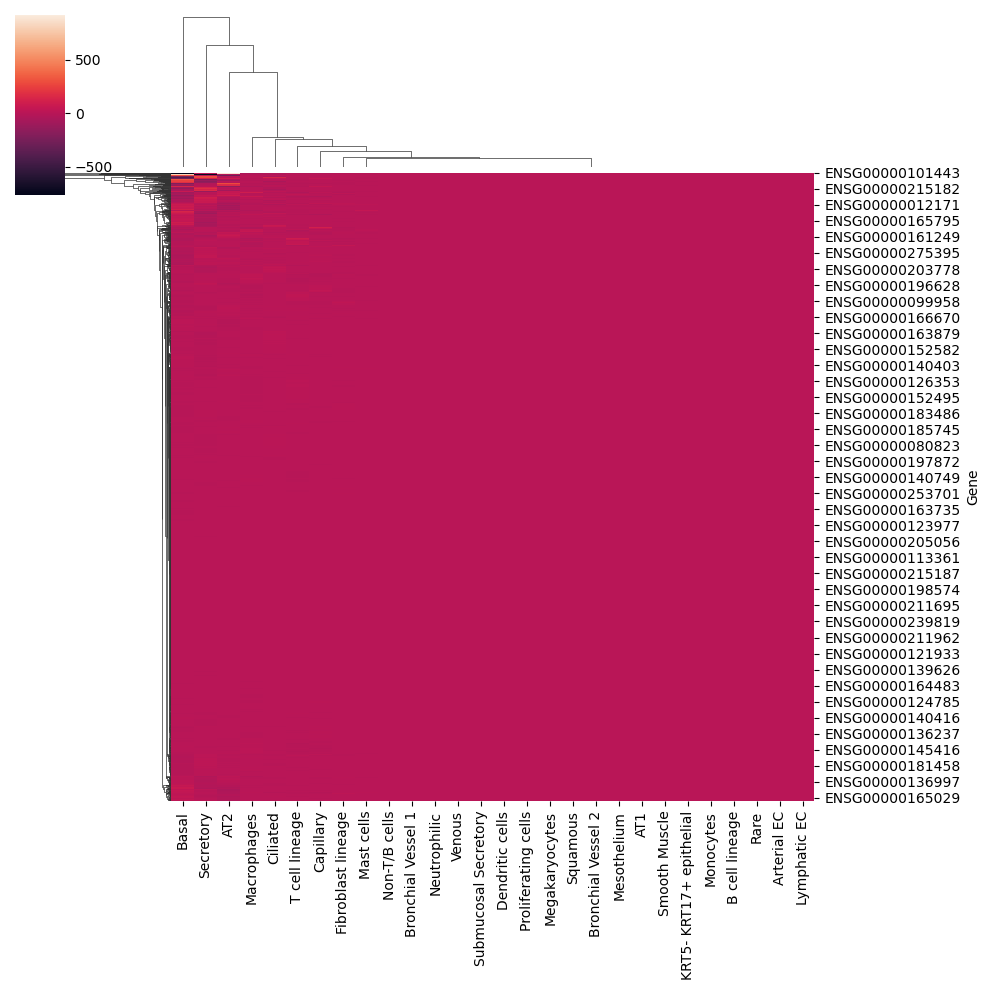

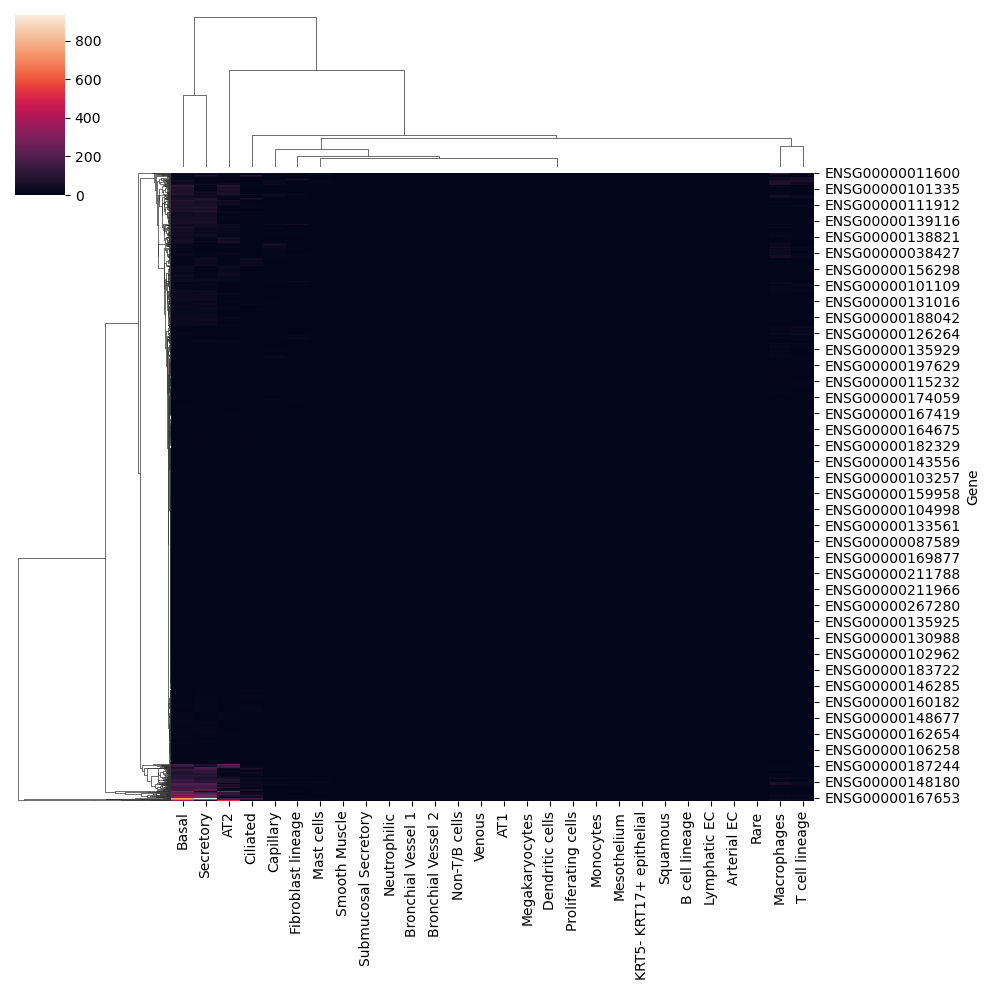

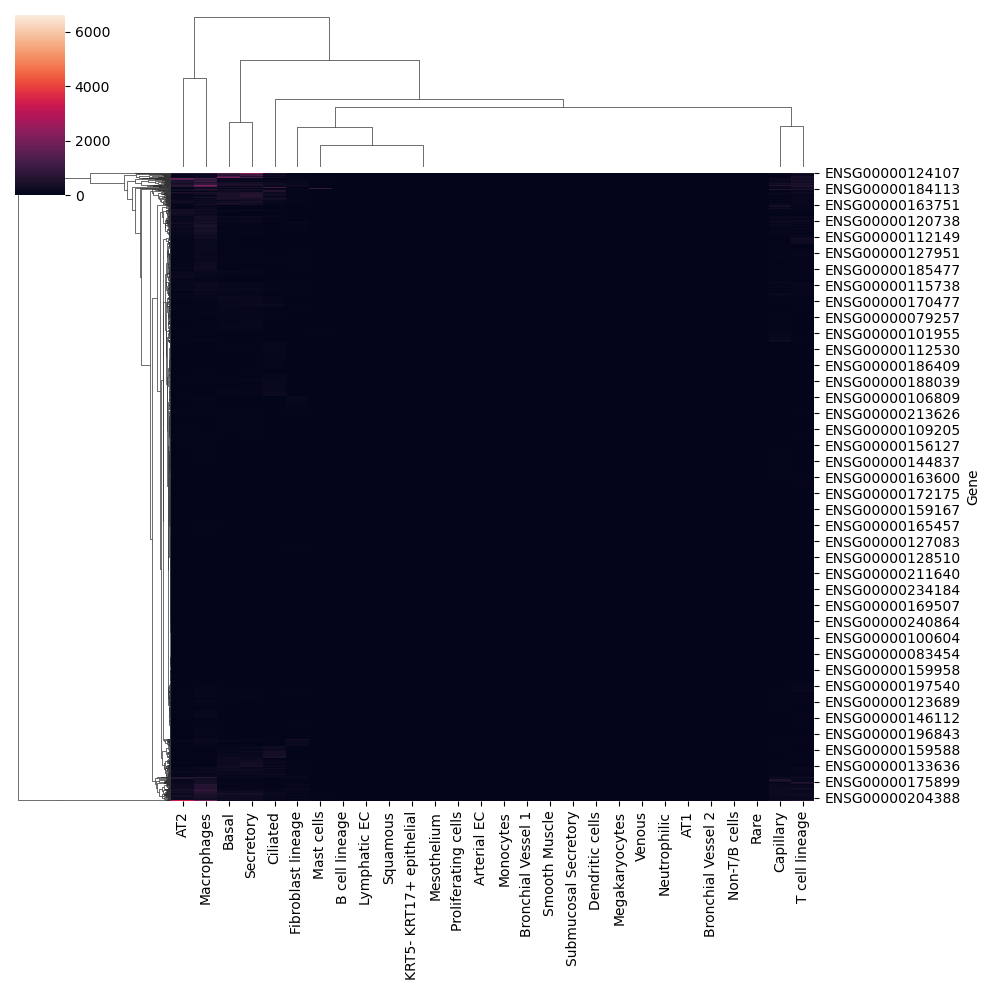

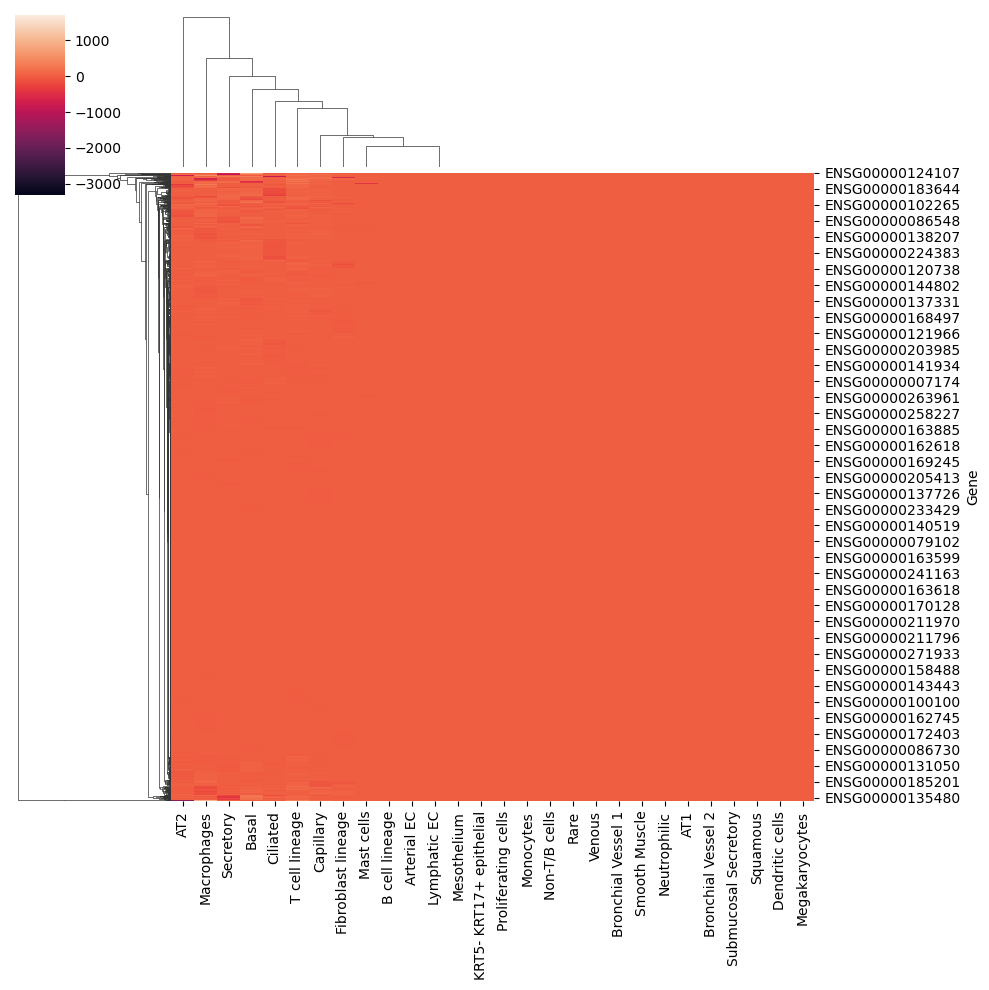

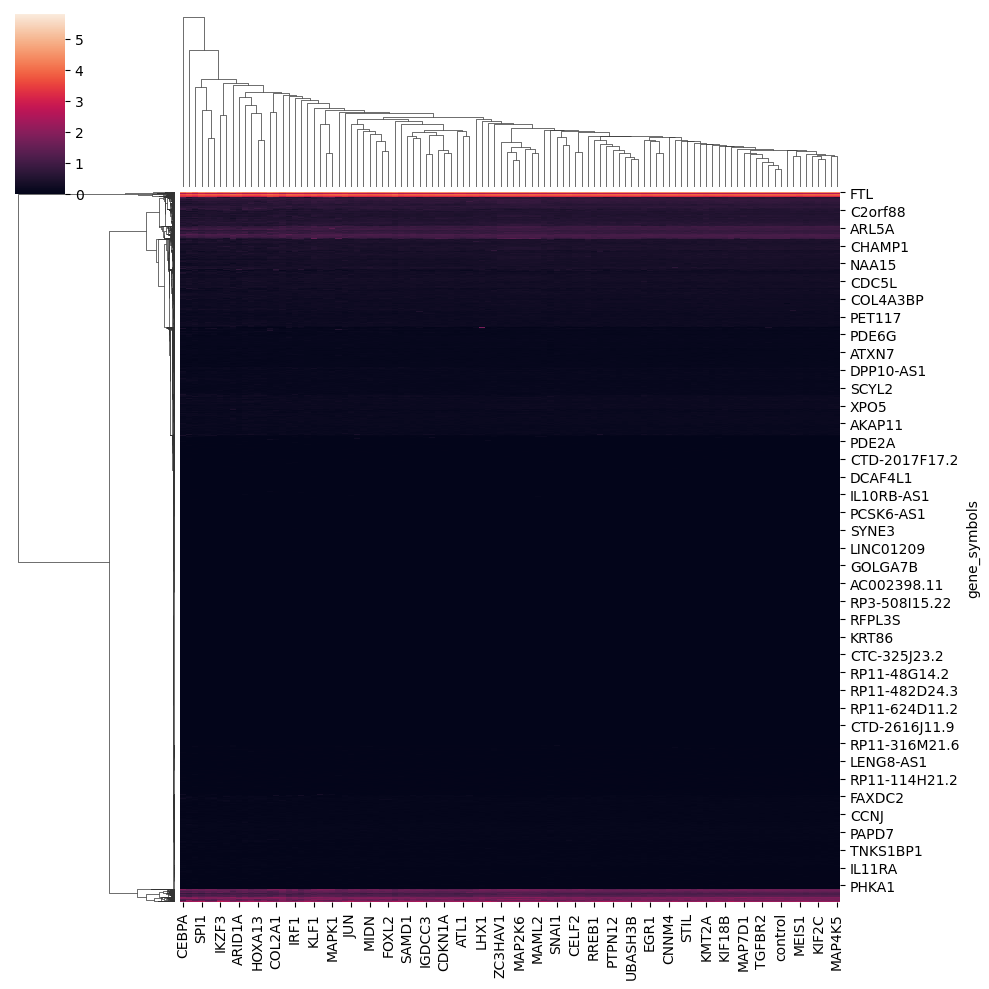

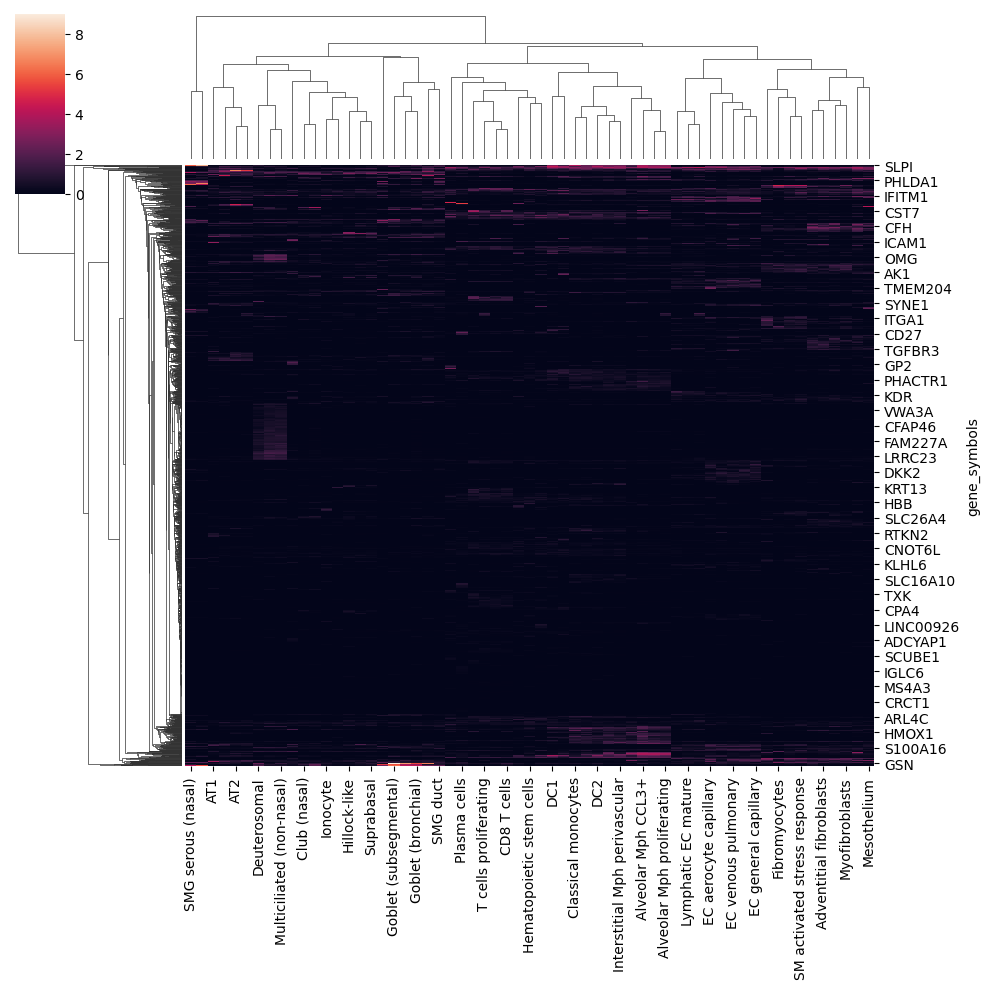

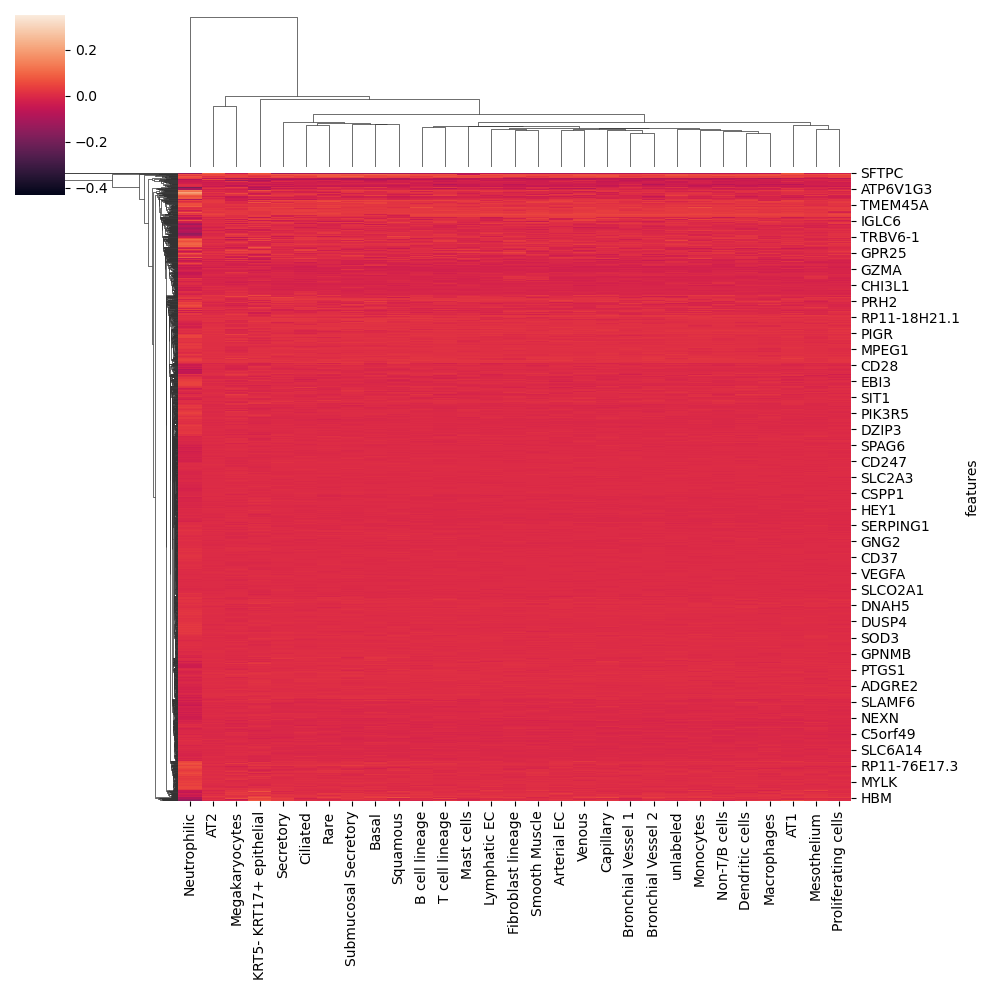

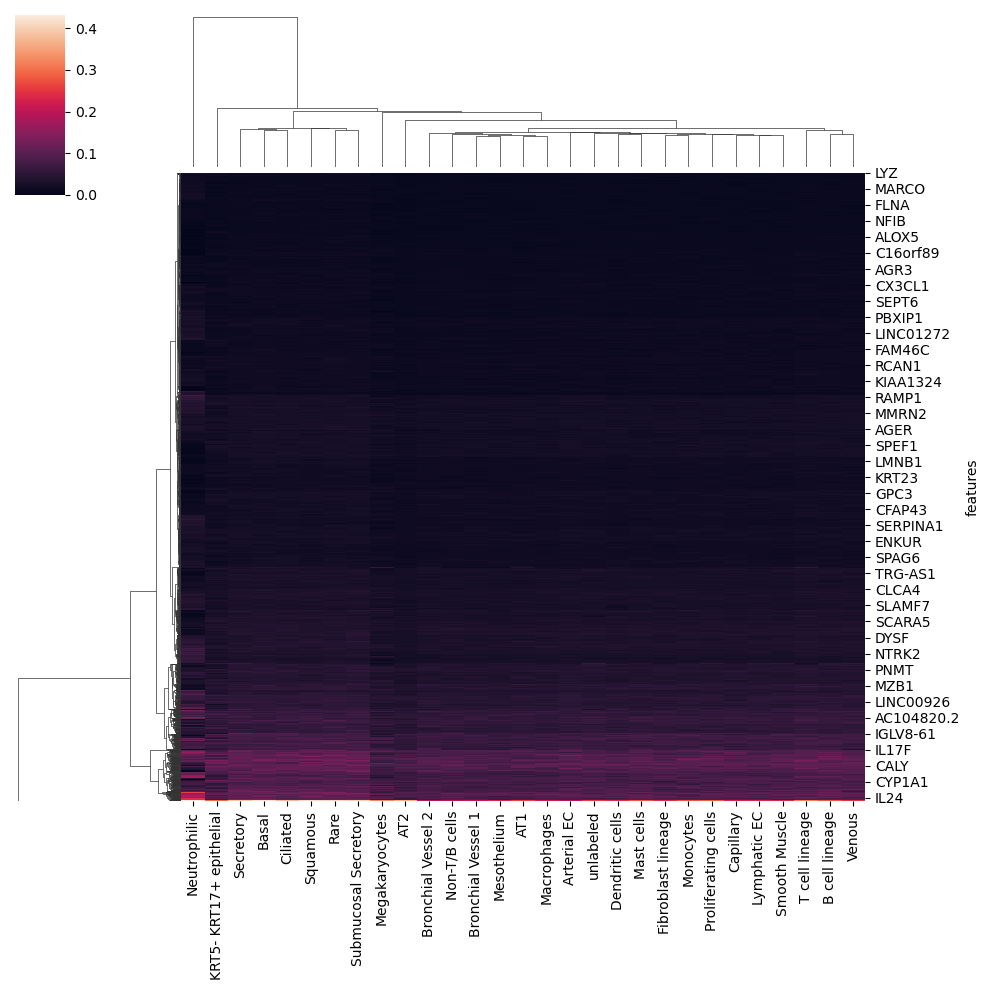

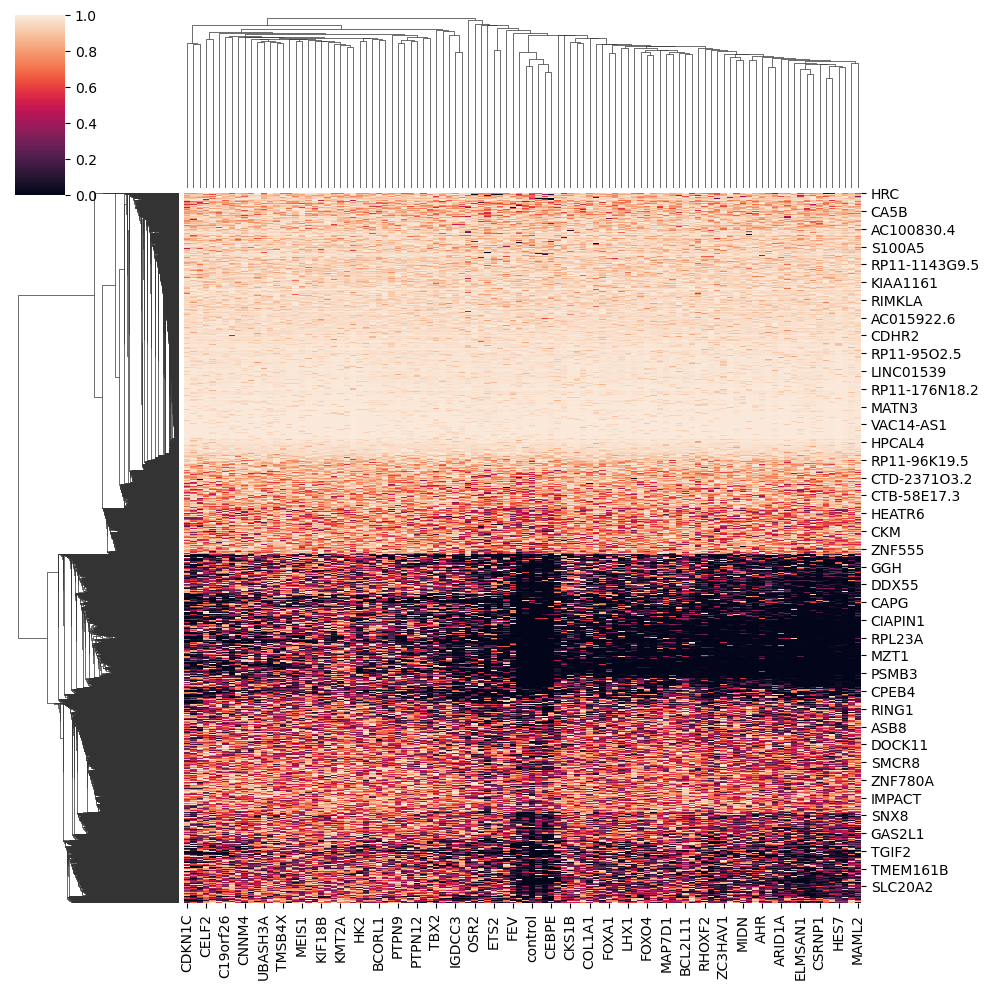

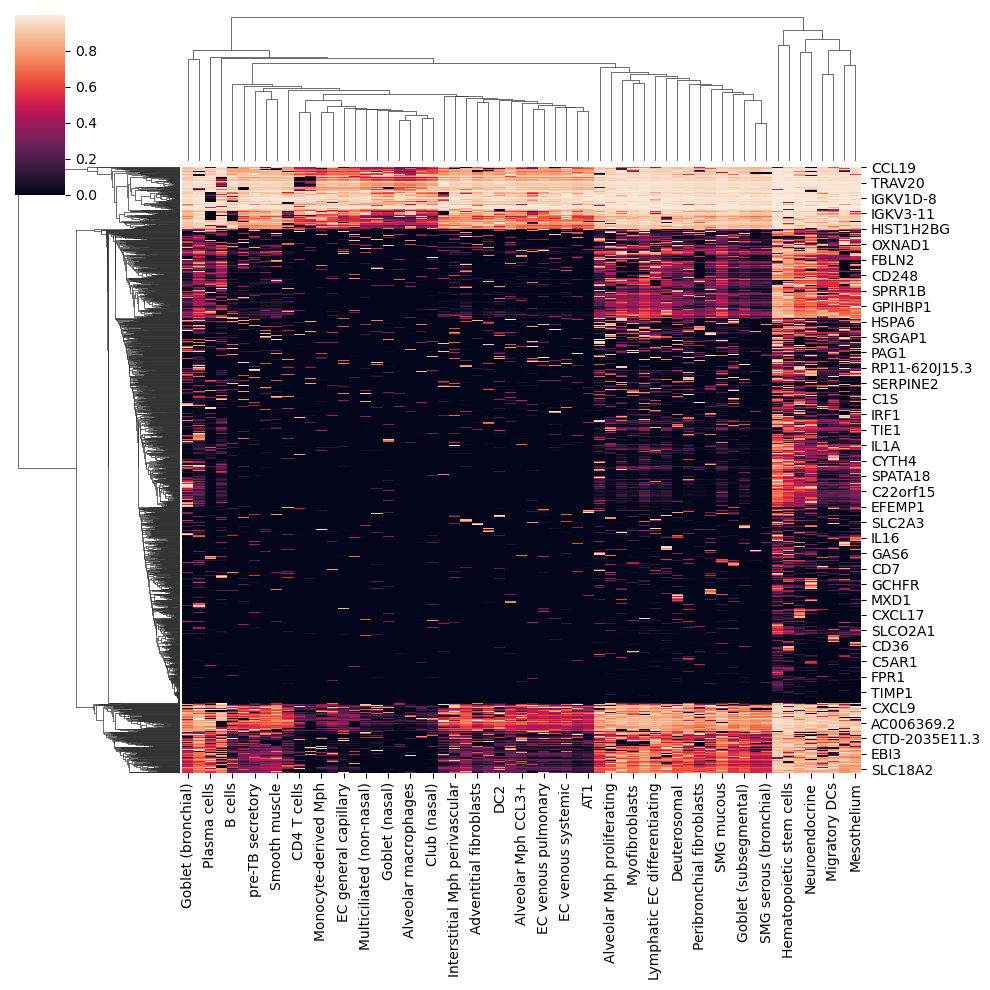

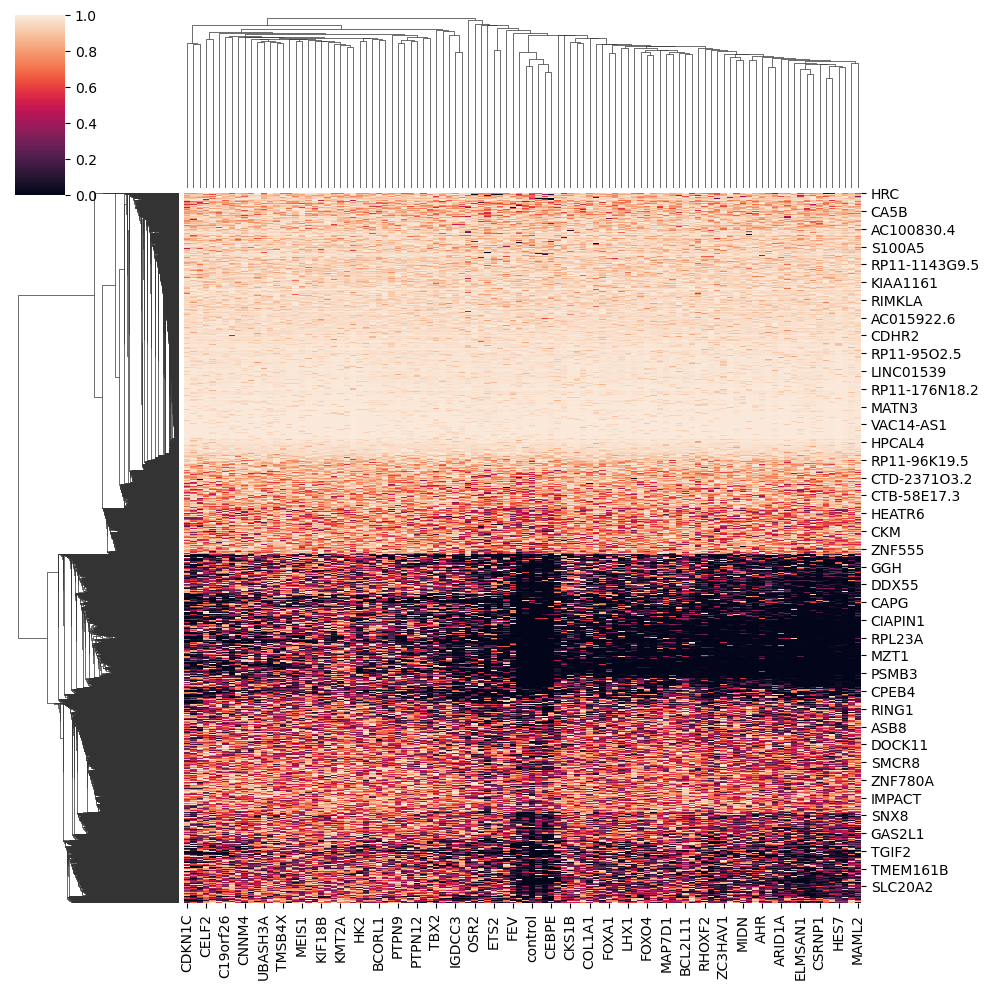

In [35]:
for table, path in all_tables.items():
    df = pd.read_csv(path,
                    index_col=0)
    print(table)
    sns.clustermap(df)